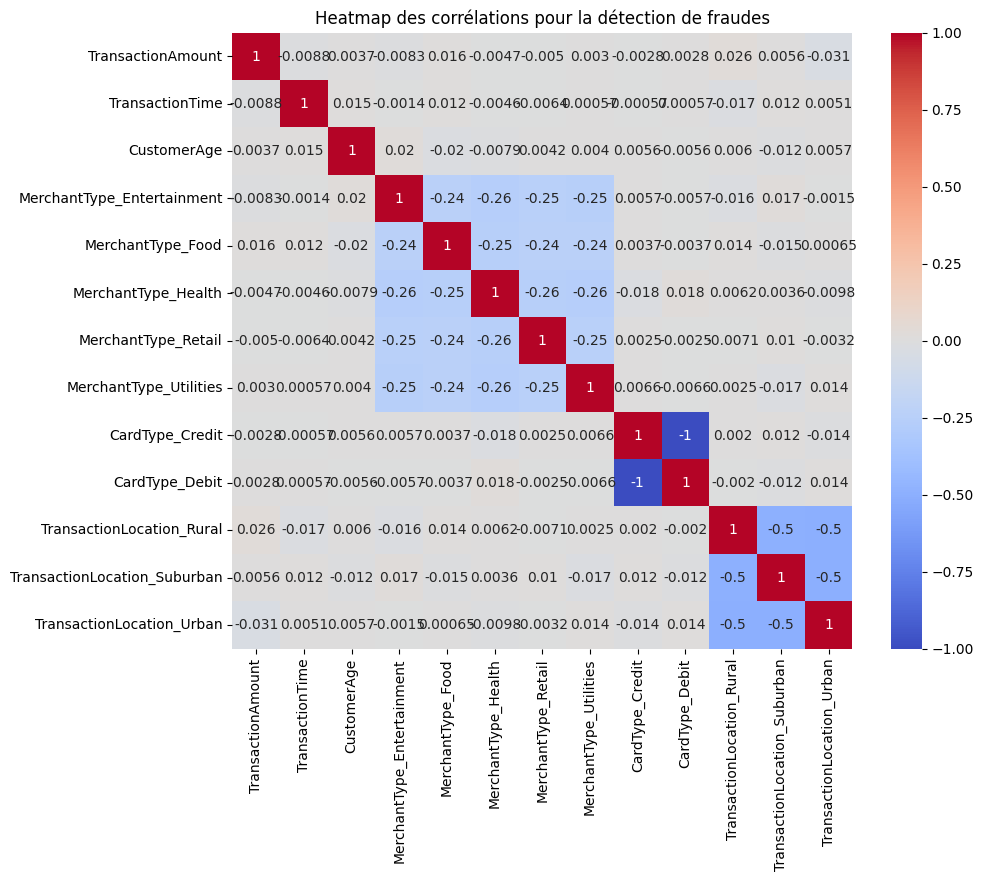

In [16]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données traitées
X_train = pd.read_csv('../data/processed/fraud_X_train.csv')
y_train = pd.read_csv('../data/processed/fraud_y_train.csv')

# Distribution des transactions frauduleuses
#fig = px.histogram(y_train, title='Distribution des Transactions Frauduleuses')
#fig.show()

# Heatmap des corrélations
corr = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap des corrélations pour la détection de fraudes')
plt.show()


In [17]:
# Analyse exploratoire
# fig = px.scatter(X_train, x='sqft_living', y=y_train.squeeze(), title='Relation entre Surface et Prix')
# fig.show()




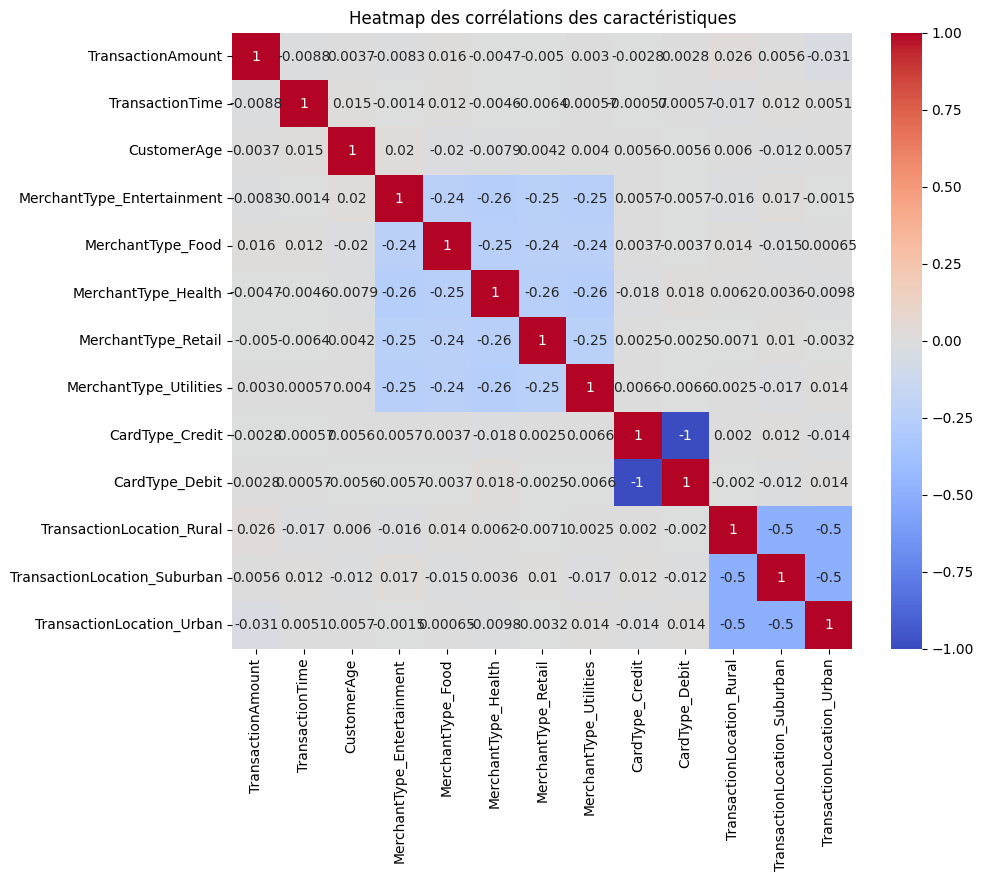

In [14]:
# Visualiser la corrélation entre les caractéristiques
corr = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap des corrélations des caractéristiques')
plt.show()

In [18]:
# notebooks/fraud_detection_analysis.ipynb

from sklearn.metrics import roc_curve, auc, precision_recall_curve
import plotly.graph_objects as go
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Split des données
X = fraud_data.drop('is_fraud', axis=1)
y = fraud_data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle de Gradient Boosting
model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'AUC = {roc_auc:.2f}'))
fig.update_layout(title='Courbe ROC', xaxis_title='Taux de Faux Positifs', yaxis_title='Taux de Vrais Positifs')
fig.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

fig = go.Figure()
fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall Curve'))
fig.update_layout(title='Courbe Precision-Recall', xaxis_title='Recall', yaxis_title='Precision')
fig.show()


KeyError: "['is_fraud'] not found in axis"